# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#Loading Dataset

In [56]:
# Set up Kaggle API for data download (ensure you have your Kaggle API key ready)
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [60]:
# Download dataset from Kaggle (replace with your actual dataset or competition)
!kaggle datasets download -d sumansharmadataworld/depression-surveydataset-for-analysis

Dataset URL: https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis
License(s): CC0-1.0
  0% 0.00/42.6k [00:00<?, ?B/s]
100% 42.6k/42.6k [00:00<00:00, 66.7MB/s]


In [62]:
# Extract the downloaded datase
import zipfile

z = zipfile.ZipFile("/content/depression-surveydataset-for-analysis.zip")
z.extractall()

In [63]:
# Read the dataset
df = pd.read_csv("/content/final_depression_dataset_1.csv")

# Checking Data Structure

In [64]:
# Display first few rows of the dataset to get a sense of the data
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [68]:
#Check the shape of  data

df.shape


(2556, 19)

In [67]:
# Check the structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [69]:
#Summary Statistcs for numerical features

df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,2556.000000,502.000000,2054.000000,502.000000,502.000000,2054.000000,2556.000000,2556.000000
mean,39.043036,3.003984,3.021908,7.567809,3.075697,3.015093,6.023865,2.968701
std,12.260596,1.390007,1.417312,1.465367,1.373490,1.418432,3.771743,1.415527
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,2.000000,6.210000,2.000000,2.000000,3.000000,2.000000
50%,39.000000,3.000000,3.000000,7.605000,3.000000,3.000000,6.000000,3.000000
75%,50.000000,4.000000,4.000000,8.825000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000


In [70]:
#Check the Duplicate values

df.duplicated().sum()

0

In [66]:
# Check unique values in the target column (Depression)
df['Depression'].unique()

array(['No', 'Yes'], dtype=object)

In [71]:
#Check the missing values
df.isnull().sum()

,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,673
Academic Pressure,2054
Work Pressure,502
CGPA,2054
Study Satisfaction,2054


## Handling Missing Values

In [132]:
# Drop rows with missing values in specific columns (if necessary)
df.dropna(subset=['Dietary Habits', 'Degree', 'Financial Stress'], inplace=True)


In [73]:
# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include = ['number']).columns
categorical_cols = df.select_dtypes(exclude = ['number']).columns


#2 Use frequent category imputation technique for handling categorical null values
#replace the nan values within the features with most frequent occuring category within the features
for col in categorical_cols :
  df[col] = df[col].fillna(df[col].mode()[0])



In [74]:
#hanling numerical missing values using iterative imputation technique
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state = 42)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [75]:
# Check if there are still any missing values
df.isnull().sum()

,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0


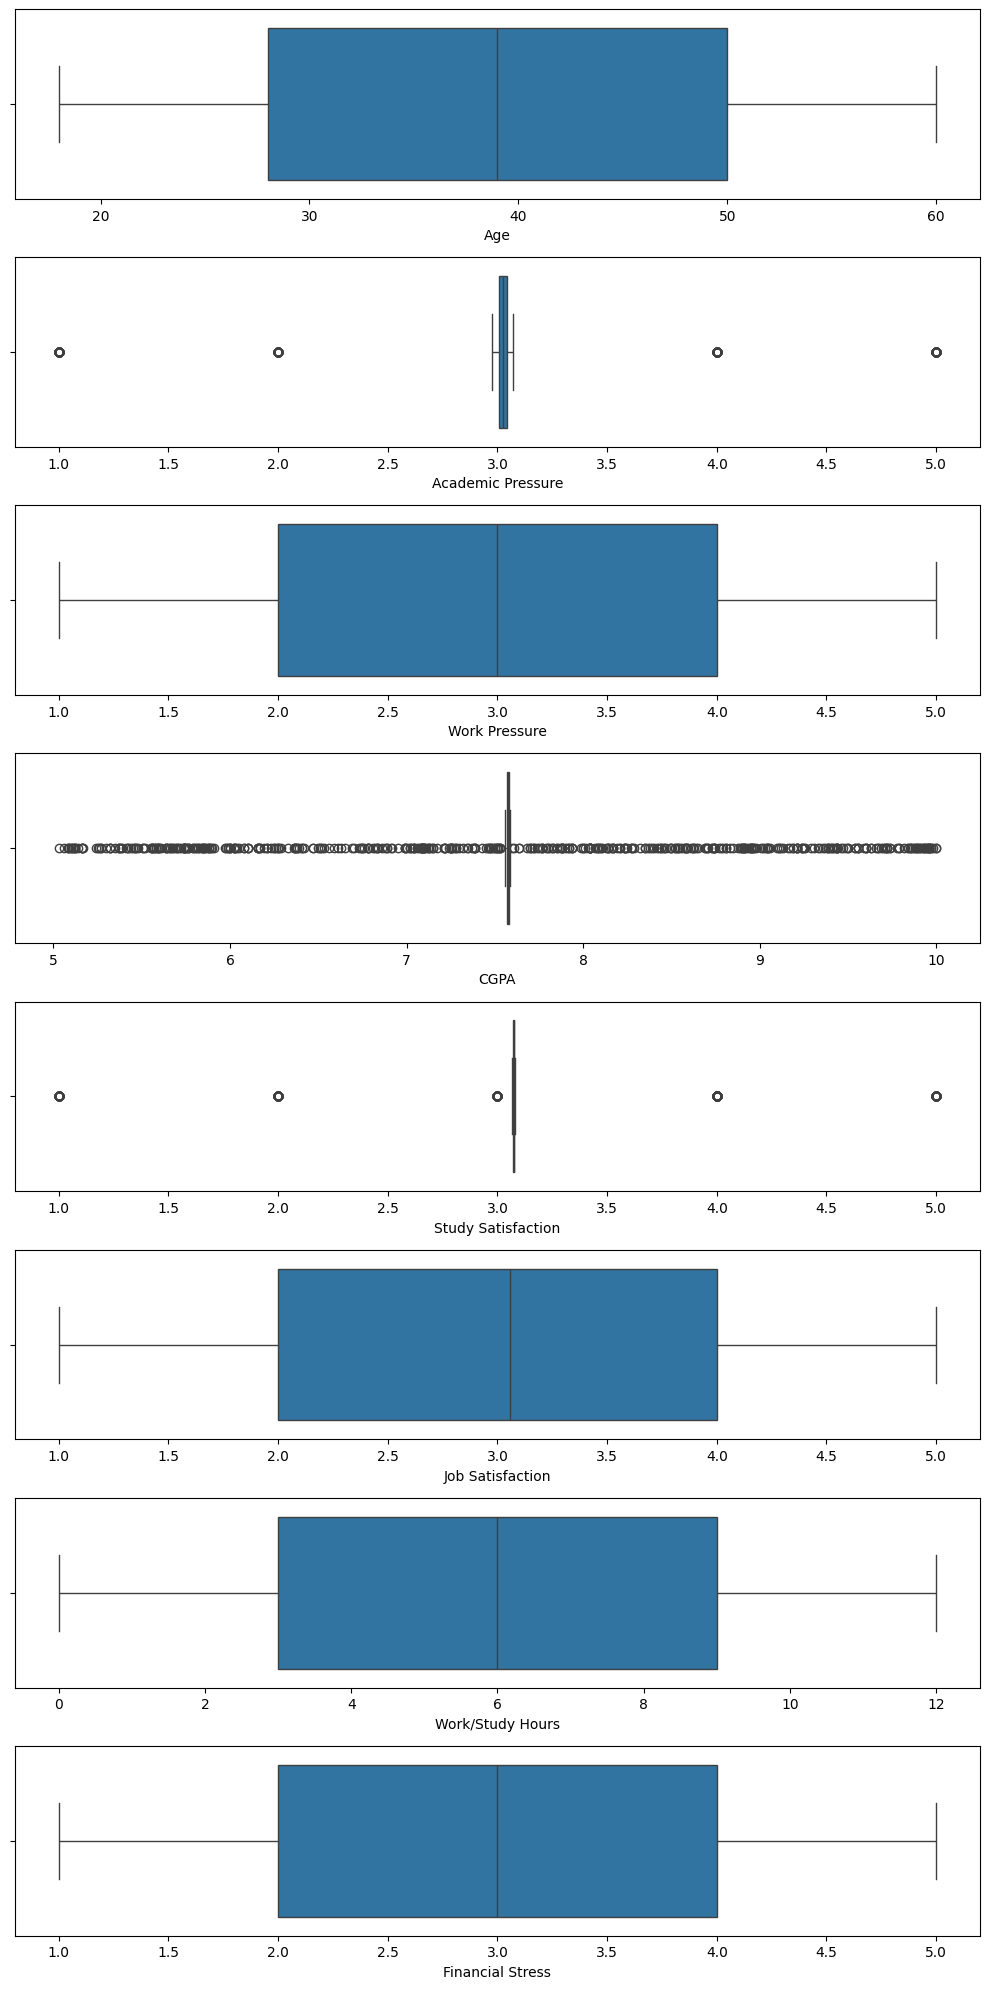

In [76]:
# Visualize outliers in numerical columns using boxplots
fig, axes = plt.subplots(nrows = len(numeric_cols), ncols = 1, figsize = (10,20))
for i , col in enumerate(numeric_cols) :
  sns.boxplot(data = df, x = col, ax = axes[i])

plt.tight_layout()
plt.show()

In [77]:
#Function to count outliers based on IQR (Interquartile Range)

def count_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = ((df[col]<lower_bound) | (df[col]>upper_bound)).sum()

  return outliers

#Funtion to handle outliers by capping them to the IQR bounds and replacing with median

def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[col].median()

    # Capping the outliers to the IQR bounds
    df[col] = np.where(df[col]<lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col]>upper_bound, upper_bound, df[col])

    #replace outliers with the median
    df[col] = df[col].apply(lambda x: median_value if x<lower_bound or x>upper_bound else x)

    return df



In [78]:
#Detect and handle outliers in the Train dataset
for column in numeric_cols : #iterate over numerical columns in the train dataset
  print(f"{column} outliers: {count_outliers(df, column)}")
  df = handle_outliers(df, column) #handle outliers

Age outliers: 0
Academic Pressure outliers: 377
Work Pressure outliers: 0
CGPA outliers: 502
Study Satisfaction outliers: 502
Job Satisfaction outliers: 0
Work/Study Hours outliers: 0
Financial Stress outliers: 0


In [79]:
# Check the outliers again after handling
for column in numeric_cols:
    print(f"{column} outliers after handling: {count_outliers(df, column)}")


Age outliers after handling: 0
Academic Pressure outliers after handling: 0
Work Pressure outliers after handling: 0
CGPA outliers after handling: 0
Study Satisfaction outliers after handling: 0
Job Satisfaction outliers after handling: 0
Work/Study Hours outliers after handling: 0
Financial Stress outliers after handling: 0


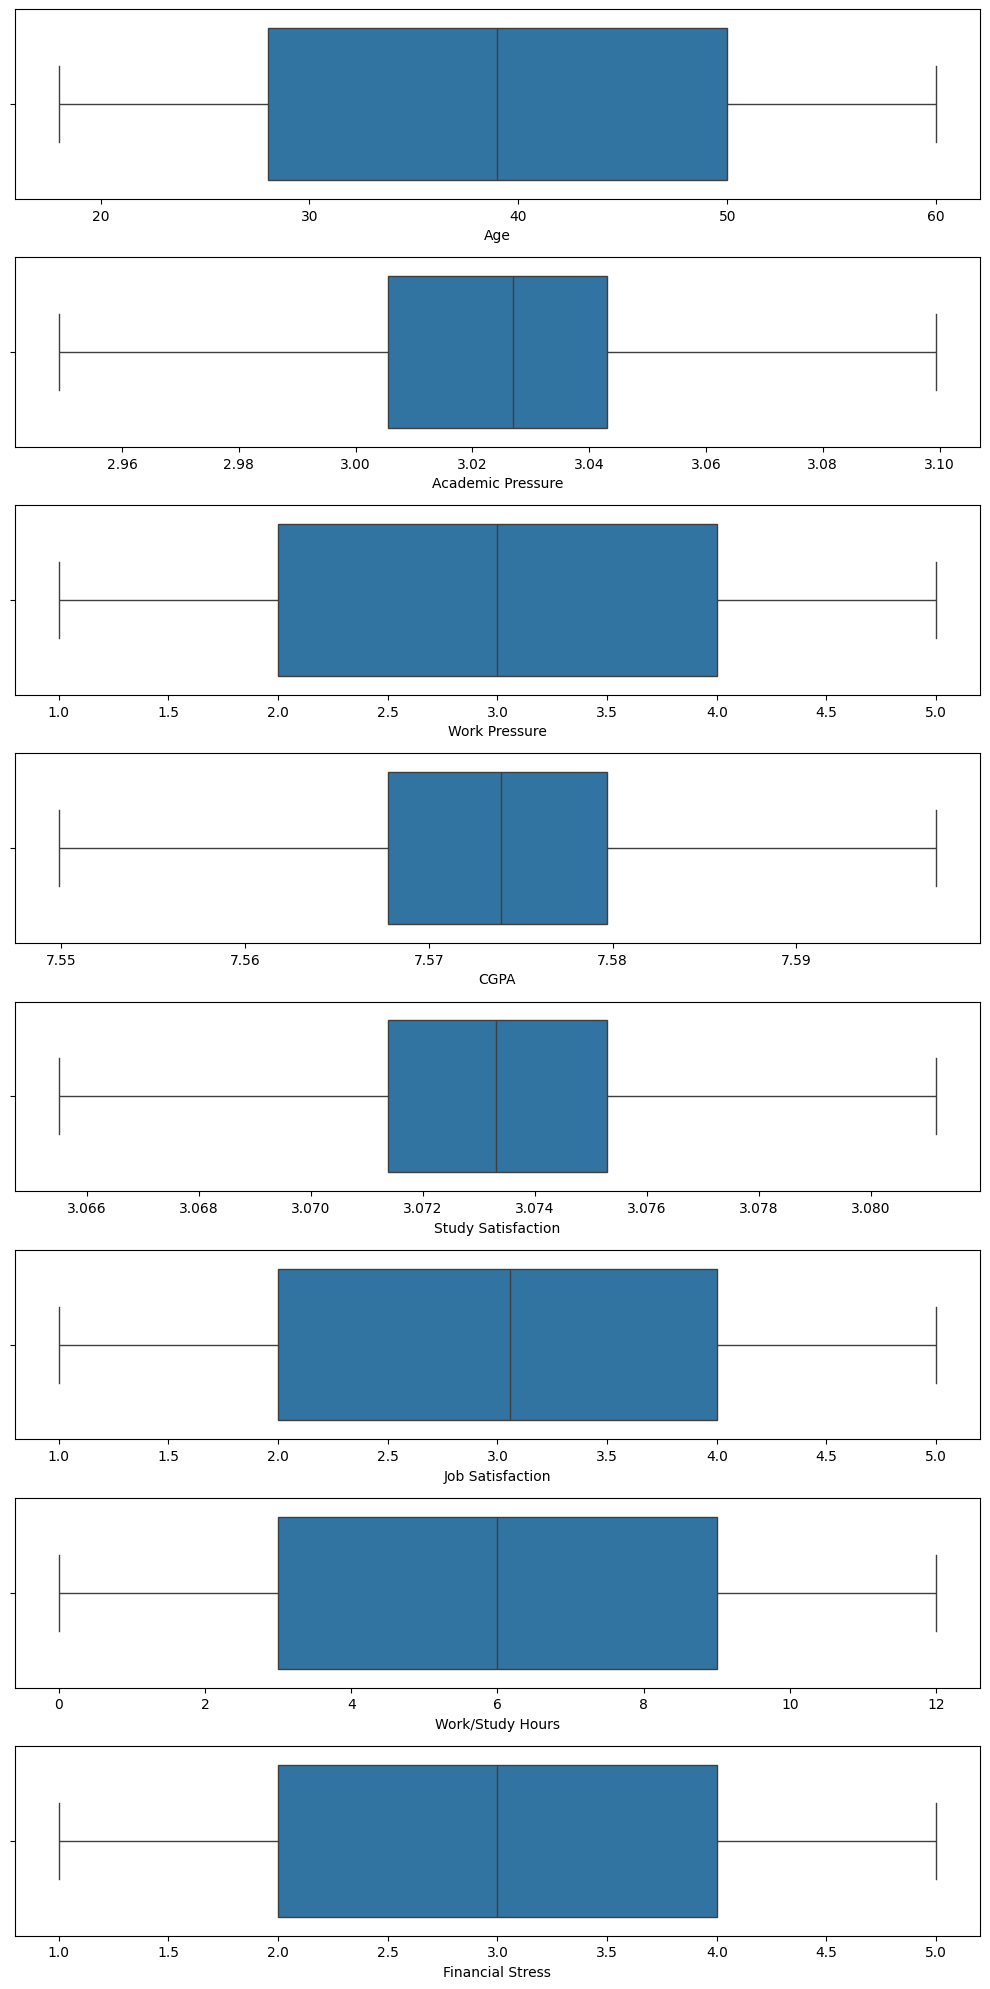

In [80]:
# Boxplot for numerical columns after handling outliers
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 20))
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
plt.tight_layout()
plt.show()

Visualization


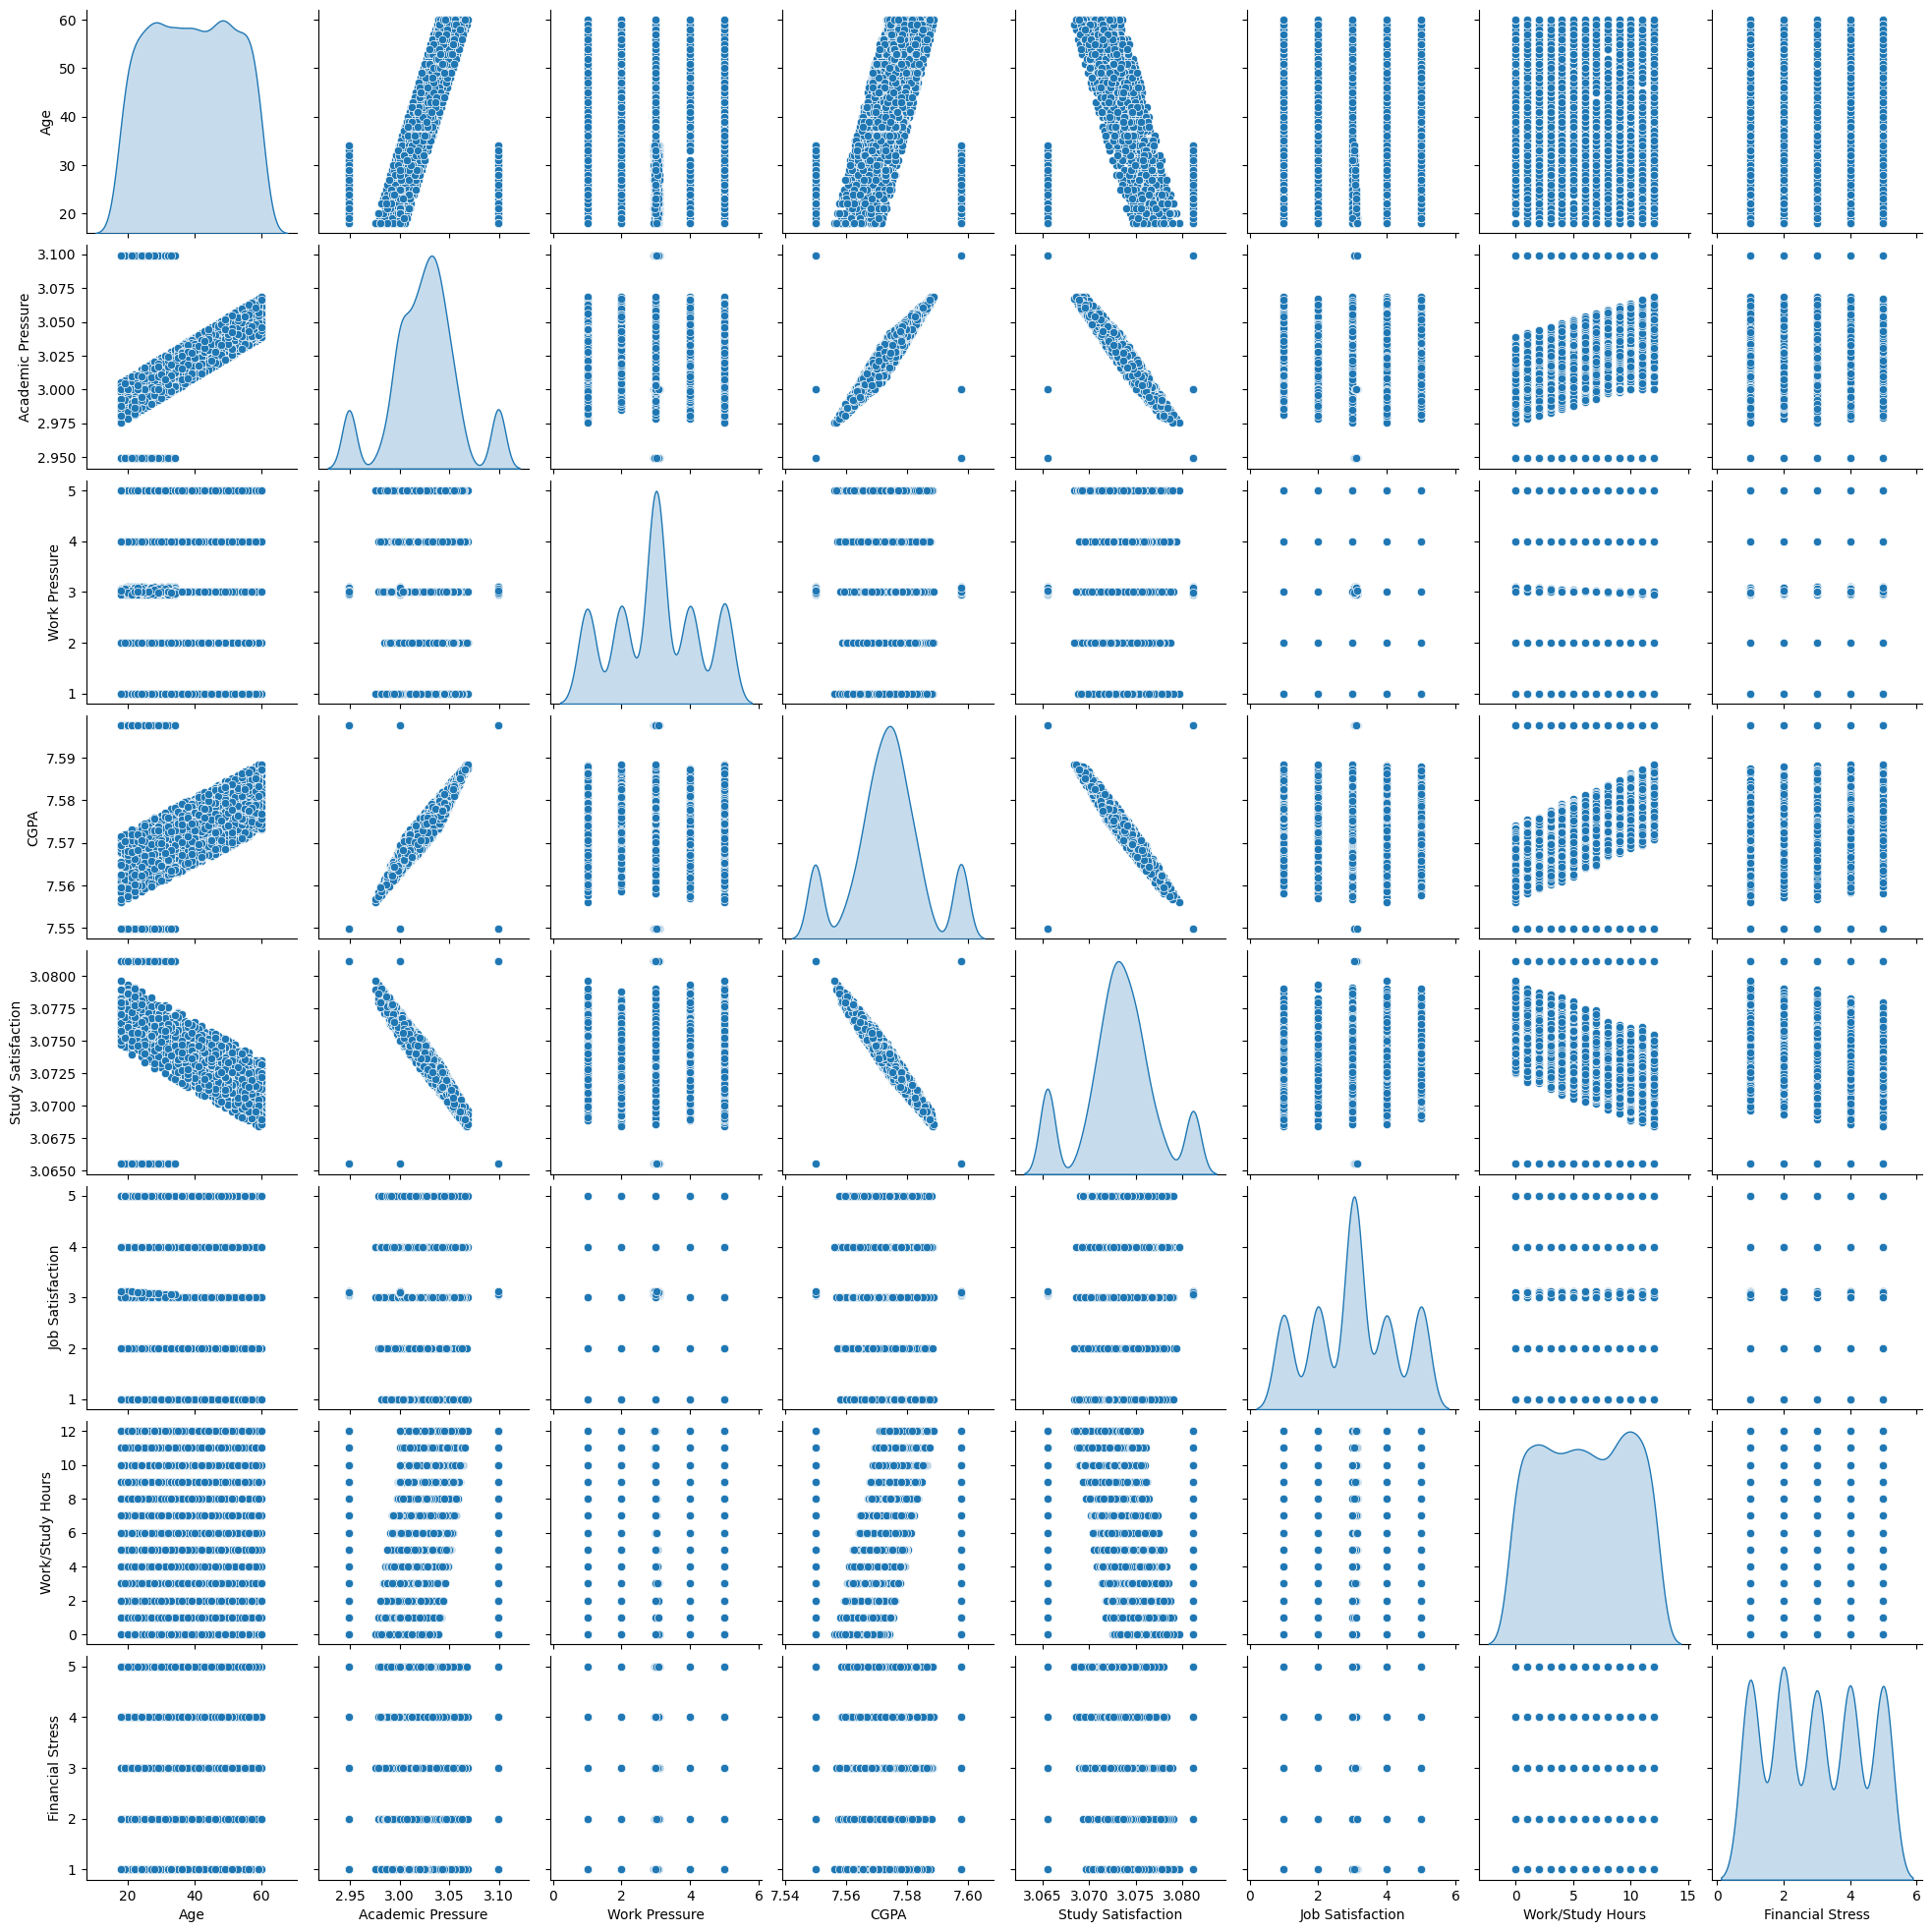

In [81]:
# Visualizing relationships between numerical features using pairplot

sns.pairplot(df, diag_kind="kde")
plt.show()

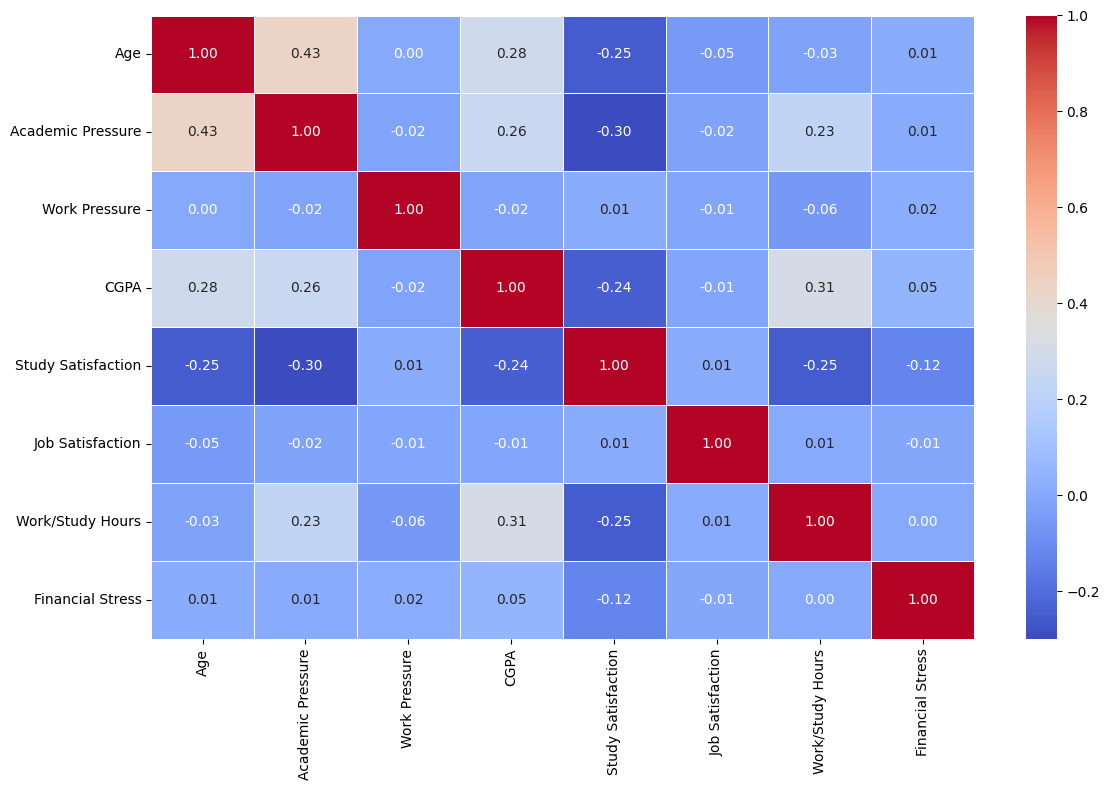

In [82]:
# Visualizing correlations between numerical features using a heatmap
plt.figure(figsize = (12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm',fmt='.2f', linewidth=0.5)
plt.tight_layout()
plt.show()

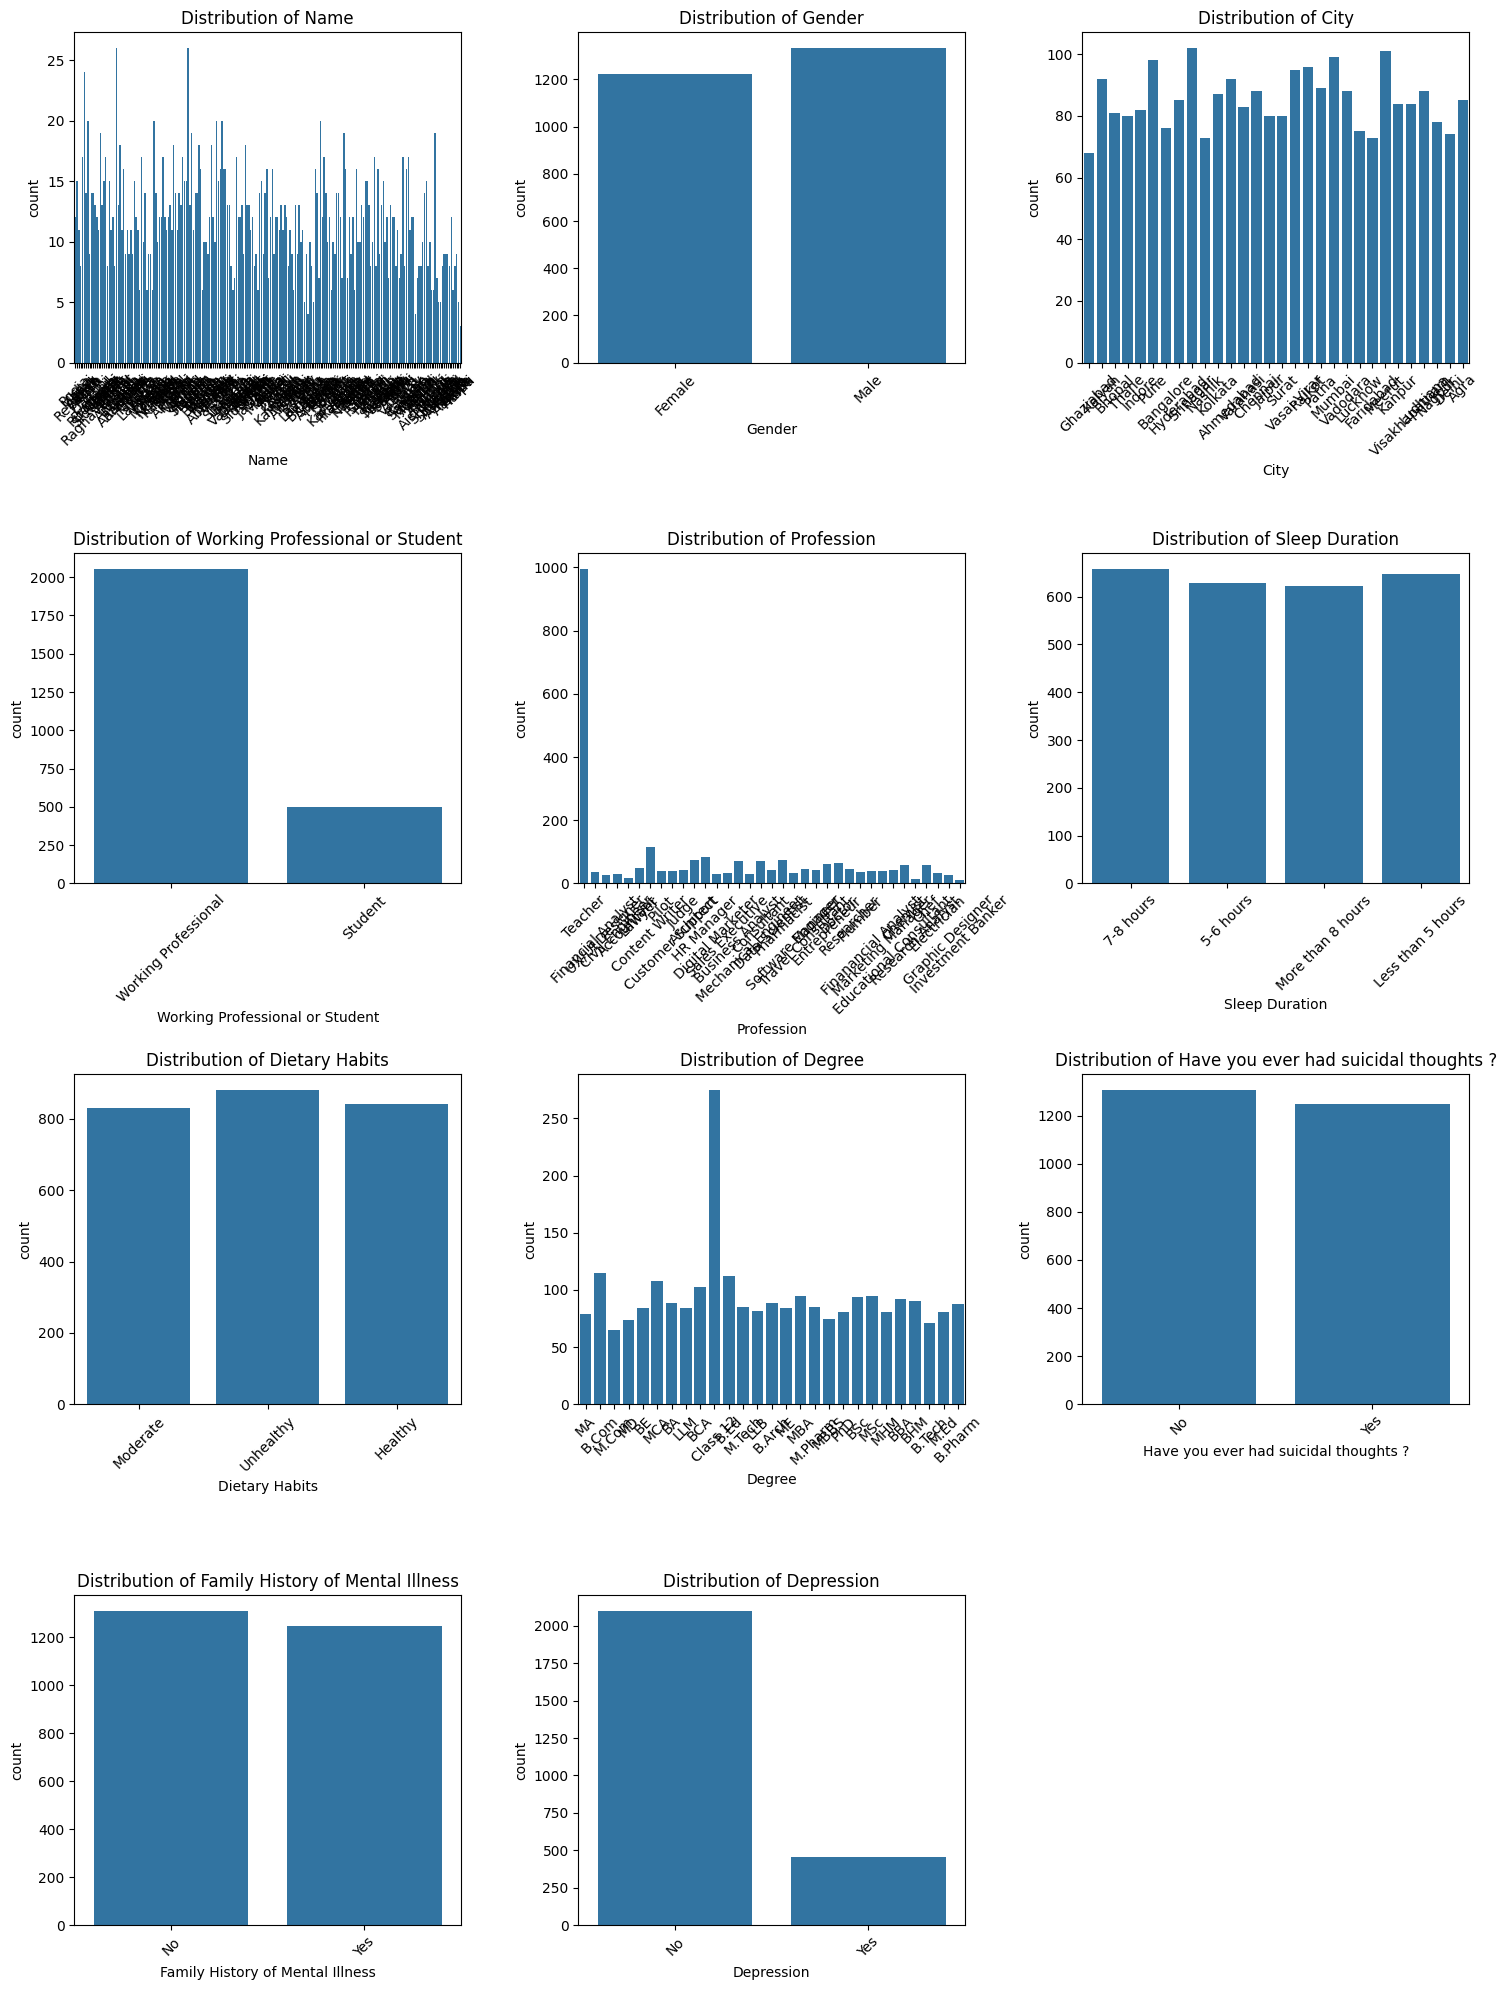

In [83]:
# Visualizing categorical variables using count plots
categorical_cols = df.select_dtypes(include='object').columns

#create grid plots
num_cols = 3
num_rows = len(categorical_cols) // num_cols + (len(categorical_cols) % num_cols != 0)

#create a figure with subplots
fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (15, num_rows *5))
axes = axes.flatten()  # Flatten the axes to make indexing easier

# Loop over categorical columns and plot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


# Hide any unused axes if the number of categorical columns isn't a perfect multiple of num_cols
for i in range(len(categorical_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

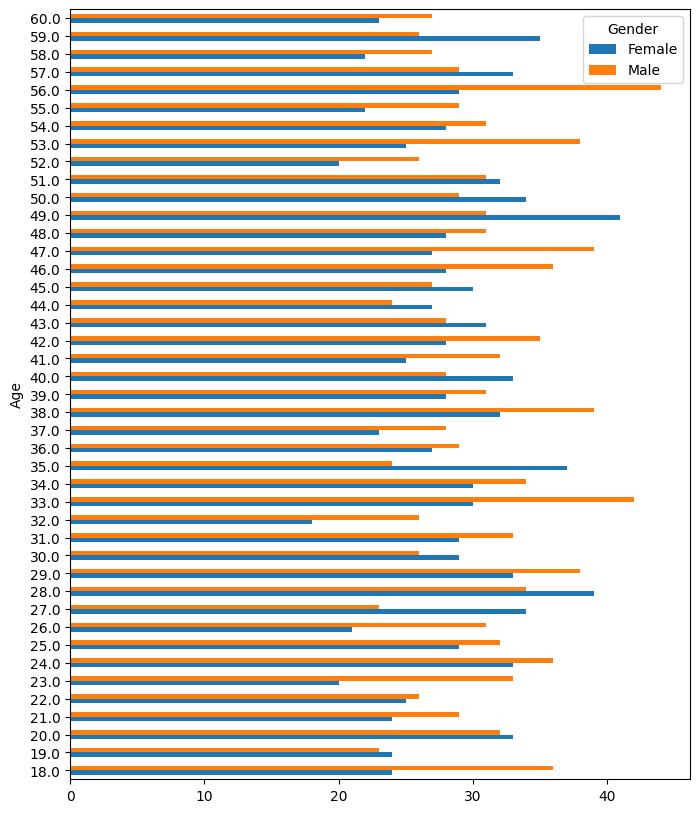

In [84]:
pd.crosstab(df['Age'], df['Gender']).plot(kind='barh', figsize=(8, 10));

# Feature Engineering

Encoding categorical variables using LabelEncoder

In [85]:
#Encoding the categorical varibles
label_cols = ['Gender', 'City', 'Working Professional or Student', 'Profession',
              'Sleep Duration', 'Dietary Habits', 'Degree',
              'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

In [133]:
def label_encode_columns(df, label_cols):
  for col in label_cols :
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
  return df

# Apply label encoding to the categorical columns
df = label_encode_columns(df, label_cols)

In [88]:
# Label encoding the target column (Depression)
label_encoder = LabelEncoder()
df['Depression'] = label_encoder.fit_transform(df['Depression'])


In [89]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,0,37.0,7,1,32,3.019140,2.0,7.571378,3.074580,4.0,1,1,18,0,6.0,2.0,0,0
1,Reyansh,1,60.0,11,1,16,3.039043,4.0,7.574022,3.072466,3.0,0,2,1,1,0.0,4.0,1,0
2,Manvi,0,42.0,3,1,32,3.011870,2.0,7.566168,3.075784,3.0,0,1,14,0,0.0,2.0,0,0
3,Isha,0,44.0,25,1,32,3.017307,3.0,7.568162,3.075174,5.0,1,0,22,1,1.0,2.0,1,0
4,Aarav,1,48.0,9,1,34,3.035853,4.0,7.576728,3.071933,3.0,1,1,8,1,6.0,5.0,1,0


In [127]:
df.tail()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2551,Raghavendra,1,25.0,2,1,6,3.015975,1.00000,7.574096,3.074045,5.000000,0,0,6,1,12.0,3.0,1,0
2552,Pihu,0,23.0,21,1,32,3.003059,3.00000,7.568450,3.075629,1.000000,2,1,18,1,8.0,3.0,0,1
2553,Sara,0,24.0,23,1,18,2.994811,1.00000,7.564374,3.076420,4.000000,2,1,5,1,4.0,4.0,0,0
2554,Eshita,0,56.0,2,1,2,3.043021,2.00000,7.577570,3.071405,3.000000,1,0,6,0,4.0,5.0,1,0
2555,Kiran,1,18.0,24,0,32,3.099409,3.01992,7.549857,3.065497,3.123582,3,2,11,0,6.0,2.0,1,1


In [90]:
df['Depression'].unique()

array([0, 1])

In [97]:
#Split the data into feature and target
X= df.drop(['Name','Depression'], axis = 1)
y = df['Depression']

In [98]:
#split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
# Initialize MinMaxScaler for scaling numerical features
scaler = MinMaxScaler()

In [100]:
# Scale the numerical features in both the training and testing datasets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
X_train_scaled

array([[1.        , 0.88095238, 0.79310345, ..., 0.83333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.48275862, ..., 0.33333333, 0.        ,
        1.        ],
       [0.        , 0.23809524, 0.68965517, ..., 0.        , 0.25      ,
        1.        ],
       ...,
       [0.        , 0.26190476, 0.72413793, ..., 0.75      , 0.        ,
        0.        ],
       [1.        , 0.38095238, 0.27586207, ..., 0.58333333, 0.        ,
        0.        ],
       [1.        , 0.35714286, 0.82758621, ..., 0.33333333, 0.75      ,
        1.        ]])

In [103]:
X_test_scaled

array([[1.        , 0.71428571, 0.72413793, ..., 0.16666667, 0.75      ,
        1.        ],
       [0.        , 0.4047619 , 0.62068966, ..., 0.91666667, 0.        ,
        1.        ],
       [1.        , 0.26190476, 0.20689655, ..., 0.        , 0.25      ,
        1.        ],
       ...,
       [1.        , 0.78571429, 0.03448276, ..., 0.16666667, 0.25      ,
        0.        ],
       [1.        , 0.4047619 , 0.96551724, ..., 0.58333333, 0.25      ,
        0.        ],
       [0.        , 0.14285714, 0.79310345, ..., 0.33333333, 0.75      ,
        0.        ]])

In [104]:
# Check the shape of the scaled data
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")

Scaled training set shape: (2044, 17)
Scaled test set shape: (512, 17)


# Building ANN Model

In [134]:
#import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [107]:
# Initialize the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))  # Adding dropout for regularization

# Second hidden layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Use sigmoid for binary classification



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [109]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7722 - loss: 0.5119 - val_accuracy: 0.8730 - val_loss: 0.3004
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8748 - loss: 0.2933 - val_accuracy: 0.9258 - val_loss: 0.1978
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9155 - loss: 0.2045 - val_accuracy: 0.9629 - val_loss: 0.1457
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1631 - val_accuracy: 0.9785 - val_loss: 0.0991
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9491 - loss: 0.1276 - val_accuracy: 0.9766 - val_loss: 0.0855
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9473 - loss: 0.1299 - val_accuracy: 0.9746 - val_loss: 0.0857
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.1146 - val_accuracy: 0.9805 - val_loss: 0.0704
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9627 - loss: 0.0909 - val_accuracy: 0.9863 - val_loss:

# Evaluate

In [110]:
# Evaluate the model
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Convert probabilities to binary predictions


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [112]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.98046875
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       429
           1       0.93      0.95      0.94        83

    accuracy                           0.98       512
   macro avg       0.96      0.97      0.96       512
weighted avg       0.98      0.98      0.98       512



# Plot the training and validation loss/accuracy curves



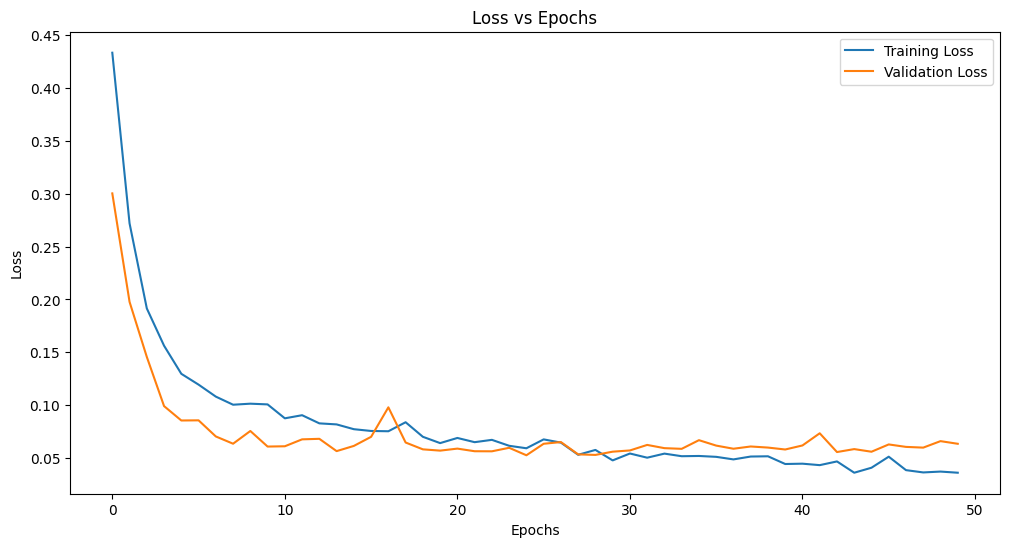

In [113]:

# Loss plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

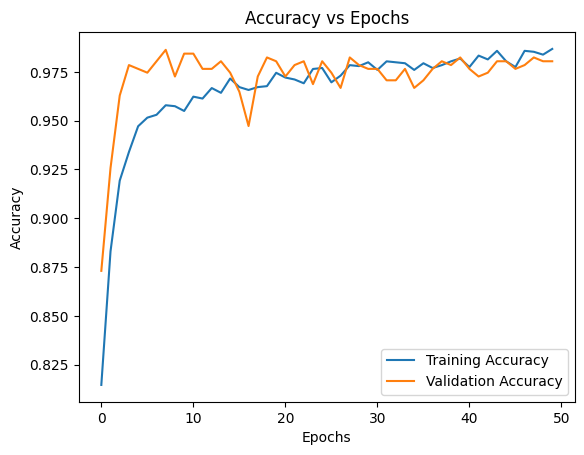

In [114]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Prediction

In [121]:
# Get model predictions (probabilities)
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")
y_pred[:5]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [126]:
# Ensure the new data has the same columns as the training set
new_data = np.array([37.0, 7, 1, 32, 3.019140, 2.0, 7.571378, 3.074580, 4.0, 1, 1, 18, 0, 6.0, 2.0, 0,0]).reshape(1, -1)

# Create a DataFrame with the same columns as X_train (excluding 'Depression' and 'Name')
new_data_df = pd.DataFrame(new_data, columns=X.columns)

# Apply scaling using the previously trained scaler
new_data_scaled = scaler.transform(new_data_df)

# Make prediction using the trained model
prediction_prob = model.predict(new_data_scaled)

# Convert probability to binary class (0 or 1)
prediction = (prediction_prob > 0.5).astype("int32")

print(f"Predicted Depression Status: {prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Depression Status: 0


In [131]:


# Ensure the new data has the same columns as the training set
new_data = np.array([0,23.0	,21	,1	,32	,3.003059	,3.00000,	7.568450	,3.075629,	1.000000,	2,	1	,18,	1	,8.0	,3.0,	0	]).reshape(1, -1)

# Create a DataFrame with the same columns as X_train (excluding 'Depression' and 'Name')
new_data_df = pd.DataFrame(new_data, columns=X.columns)

# Apply scaling using the previously trained scaler
new_data_scaled = scaler.transform(new_data_df)

# Make prediction using the trained model
prediction_prob = model.predict(new_data_scaled)

# Convert probability to binary class (0 or 1)
prediction = (prediction_prob > 0.5).astype("int32")

print(f"Predicted Depression Status: {prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Depression Status: 1
